<a href="https://colab.research.google.com/github/ckalibsnelson/HackCville---Node-A/blob/master/04_Beautiful_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Data Visualization

More than just using plt

![matplotlib figure](https://matplotlib.org/_images/anatomy.png)

Sources:
- http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
- https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
- https://matplotlib.org/api/axes_api.html
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

## Change the look of the graph

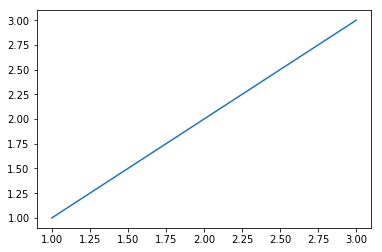

In [0]:
# default google colab graph
plt.plot([1,2,3],[1,2,3])
plt.show()

In [0]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)  # use this at the beginning, or when you want to change styles

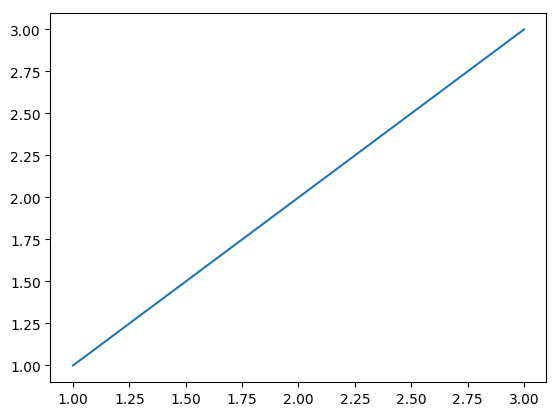

In [0]:
# default matplotlib graph
plt.plot([1,2,3],[1,2,3])
plt.show()

In [0]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-paper',
 'seaborn-deep',
 'seaborn-darkgrid',
 'dark_background',
 'seaborn-whitegrid',
 'tableau-colorblind10',
 '_classic_test',
 'seaborn-dark-palette',
 'fast',
 'seaborn-ticks',
 'seaborn-colorblind',
 'classic',
 'ggplot',
 'grayscale',
 'seaborn-pastel',
 'seaborn-bright',
 'fivethirtyeight',
 'bmh',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn',
 'seaborn-white']

In [0]:
# change the style of the graph to something different
style.use('seaborn') # this is the R default style

## Figure vs. Axes

The figure is the panel containing the entire graphic, while the axes are the individual graphs. With axes, we can create more than one graph on the same figure (panel) and customize the graphs more, and you use them the exact same way as `plt`.

So from now on, think of a plot as an __Axes__.

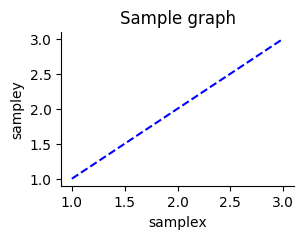

In [0]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(3, 2)) # how to get the axes. you can also specify the figure size in here

# remove the top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot([1,2,3], [1,2,3], 'b--') # can also use plt.plot, which accesses the axes
ax.set(title="Sample graph", xlabel="samplex", ylabel="sampley") # handy method to set all labels in one command



plt.show()

# Graphing Some Data

https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/

In [0]:
majors = pd.read_csv('http://bit.ly/538collegegradmajordata') # fivethirtyeight college major data

In [0]:
majors.shape

(173, 21)

In [0]:
majors.sample(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
13,14,5008,MATERIALS SCIENCE,4279.0,2949.0,1330.0,Engineering,0.310820,22,3307,...,878,1967,78,0.023043,60000,39000,65000,2626,391,81
17,18,2400,GENERAL ENGINEERING,61152.0,45683.0,15469.0,Engineering,0.252960,425,44931,...,7199,33540,2859,0.059824,56000,36000,69000,26898,11734,3192
88,89,6199,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,13386.0,1589.0,11797.0,Health,0.881294,81,10076,...,4145,5868,893,0.081411,36000,23000,42000,5652,3835,1422
63,64,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,14240.0,9658.0,4582.0,Agriculture & Natural Resources,0.321770,273,12323,...,2196,9093,649,0.050031,40000,25000,50000,1925,6221,1362


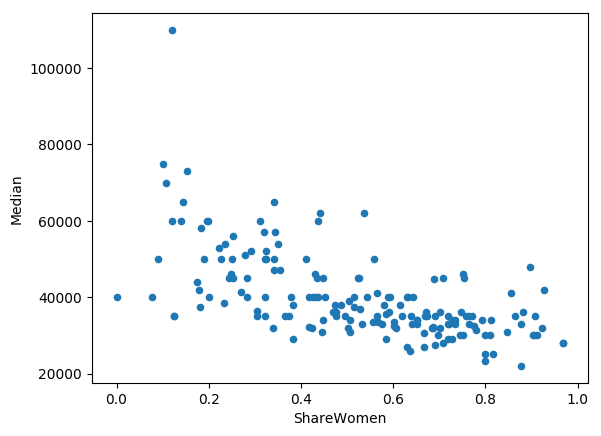

In [0]:
majors.plot(x='ShareWomen', y='Median', kind='scatter') # quick way to plot data using pandas

### Let's try with matplotlib first

In [0]:
categories = majors['Major_category'].value_counts()
categories

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Psychology & Social Work                9
Social Science                          9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

Color maps: https://matplotlib.org/examples/color/colormaps_reference.html

In [0]:
cmap = plt.get_cmap('viridis')
import numpy as np
colors = cmap(np.linspace(0, 1, len(categories)))

In [0]:
colors # the cmap has generated uniformly spaced rgb values for each of our Major_categories

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.282656, 0.100196, 0.42216 , 1.      ],
       [0.277134, 0.185228, 0.489898, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.221989, 0.339161, 0.548752, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ],
       [0.163625, 0.471133, 0.558148, 1.      ],
       [0.139147, 0.533812, 0.555298, 1.      ],
       [0.120565, 0.596422, 0.543611, 1.      ],
       [0.134692, 0.658636, 0.517649, 1.      ],
       [0.20803 , 0.718701, 0.472873, 1.      ],
       [0.327796, 0.77398 , 0.40664 , 1.      ],
       [0.477504, 0.821444, 0.318195, 1.      ],
       [0.647257, 0.8584  , 0.209861, 1.      ],
       [0.82494 , 0.88472 , 0.106217, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [0]:
majors['color'] = majors['Major_category'].apply(lambda x: colors[categories.index.get_loc(x)])
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,color
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,"[0.267004, 0.004874, 0.329415, 1.0]"
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,"[0.267004, 0.004874, 0.329415, 1.0]"
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,"[0.267004, 0.004874, 0.329415, 1.0]"
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,"[0.267004, 0.004874, 0.329415, 1.0]"
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,"[0.267004, 0.004874, 0.329415, 1.0]"


[]

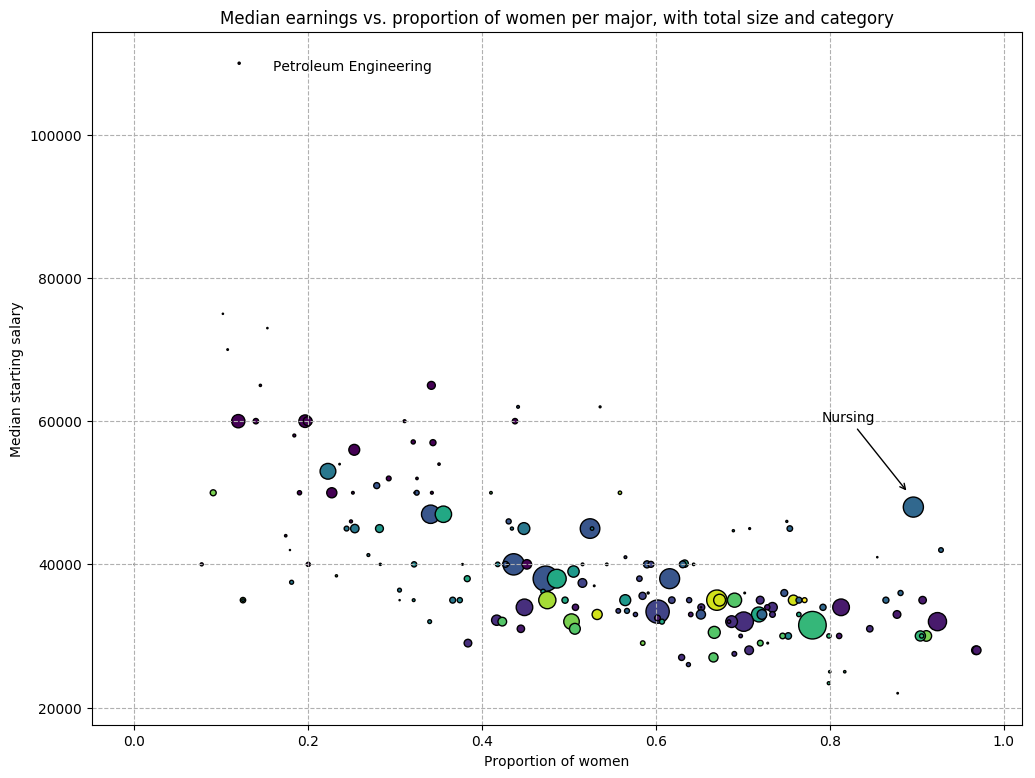

In [0]:
fig, ax = plt.subplots(figsize=(12,9))
ax.grid(True, linestyle="--")



ax.scatter(majors['ShareWomen'], majors['Median'], s=majors['Total']/1000, edgecolors='black', c=majors['color']) # representing FOUR variables on the same graph


"""
    's' is setting the size of the markers
    'edgecolors' is changing the color of the marker outlines
"""
# ax.legend() # didn't get time to figure this out!! sorry! more complicated than i thought

ax.set(title="Median earnings vs. proportion of women per major, with total size and category", xlabel="Proportion of women", ylabel="Median starting salary")
ax.text(0.16, 109000, "Petroleum Engineering") # add plain text
ax.annotate("Nursing", (0.89, 50000), (0.79, 60000), arrowprops={'arrowstyle': '->'}) # add text with an arrow

plt.savefig('graph.png', dpi=1000) # save the graph with high resolution!
# default resolution 70
plt.plot()

In [0]:
from google.colab import files
files.download('graph.png') # download the graph!

# Seaborn

In [0]:
!pip install --upgrade seaborn
import seaborn as sns

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
sns.__version__

'0.9.0'

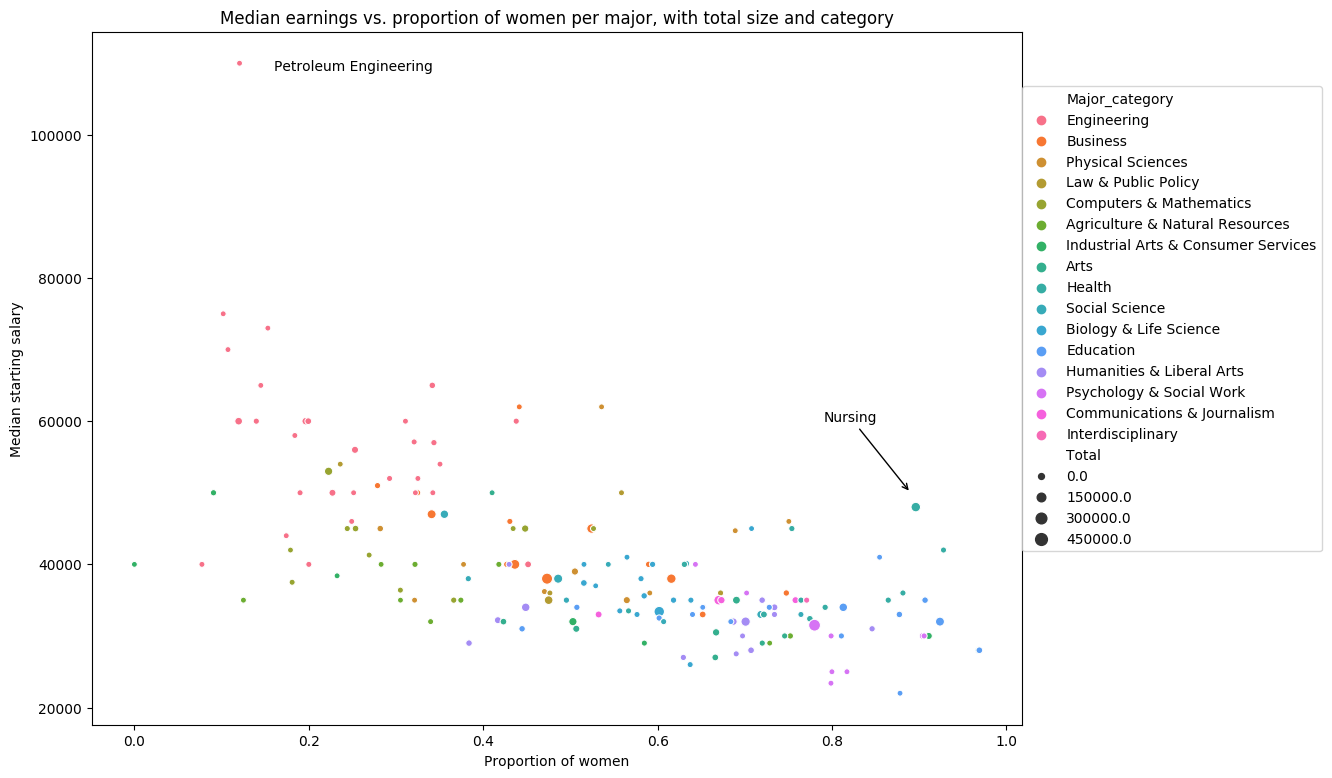

In [0]:
plt.figure(figsize=(12,9))

scatter = sns.scatterplot(x=majors['ShareWomen'], y=majors['Median'], hue=majors['Major_category'], size=majors['Total'])
scatter.legend(loc=(1,0.25)) # specify the legend location manually, otherwise it overlaps with the graph

plt.title("Median earnings vs. proportion of women per major, with total size and category")
plt.xlabel("Proportion of women")
plt.ylabel("Median starting salary")
plt.text(0.16, 109000, "Petroleum Engineering") # add plain text
plt.annotate("Nursing", (0.89, 50000), (0.79, 60000), arrowprops={'arrowstyle': '->'}) # add text with an arrow

plt.savefig('seaborngraph.png', dpi=300, bbox_inches="tight") # the legend box was getting cut off, so the solution was bbox_inches

In [0]:
from google.colab import files
files.download('seaborngraph.png')

## Planning Section
Everything below

The most interesting graphs have more than 2 features, so let's plot a bar graph of Median salary vs. major category, with a color code for unemployment

In [0]:
major_category = majors.groupby('Major_category')[['Unemployment_rate', 'Median']]

In [0]:
mcm = major_category.mean()
mcm

,Unemployment_rate,Median
Major_category,,
Agriculture & Natural Resources,0.056328,36900.000000
Arts,0.090173,33062.500000
Biology & Life Science,0.060918,36421.428571
Business,0.071064,43538.461538
Communications & Journalism,0.075538,34500.000000
Computers & Mathematics,0.084256,42745.454545
Education,0.051702,32350.000000
Engineering,0.063334,57382.758621
Health,0.065920,36825.000000


In [0]:
def convert_colors(x):
  x = float(x)
  if x > 0.09:
    return 'red'
  elif x <= 0.09 and x > 0.08:
    return 'orange'
  elif x <= 0.08 and x > 0.07:
    return 'yellow'
  elif x <= 0.07 and x > 0.06:
    return 'pink'
  else:
    return 'green'

mcm['colors'] = mcm['Unemployment_rate'].apply(convert_colors)
mcm.head()

,Unemployment_rate,Median,colors
Major_category,,,
Agriculture & Natural Resources,0.056328,36900.000000,green
Arts,0.090173,33062.500000,red
Biology & Life Science,0.060918,36421.428571,pink
Business,0.071064,43538.461538,yellow
Communications & Journalism,0.075538,34500.000000,yellow


No handles with labels found to put in legend.


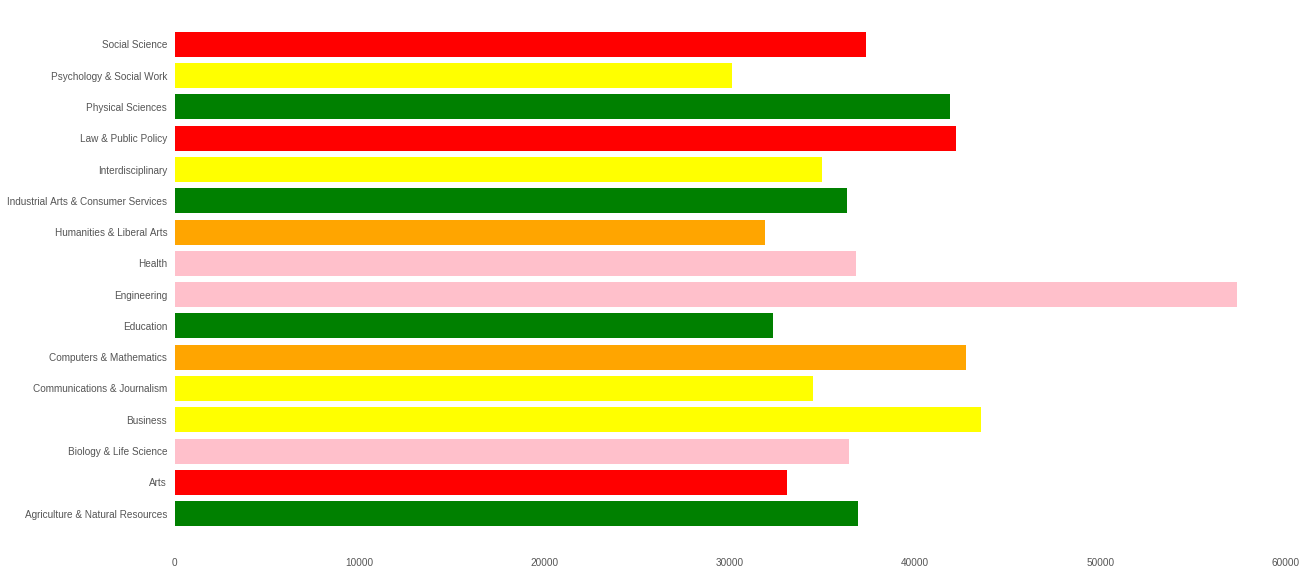

In [0]:
fig, ax = plt.subplots() # this is the usual way of creating one axes to plot on

ax.spines['left'].set_visible(True)

ax.barh(mcm.index, mcm['Median'], color=mcm['colors'])
ax.set_facecolor('w')
ax.figure.set_size_inches(20, 10)

ax.legend()

plt.show()

In [0]:
plt.savefig('majors_bar.png', dpi=100)

<Figure size 576x396 with 0 Axes>

In [0]:
from google.colab import files
files.download('majors_bar.png')

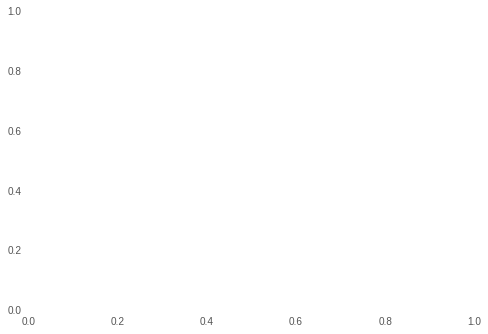

In [0]:
plt.axes(facecolor='w')

Now we will plot 3 graphs on the same panel using subplot

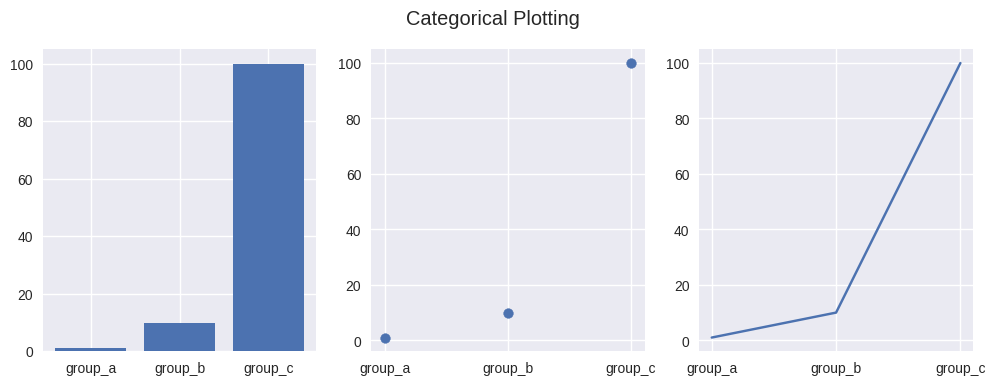

In [0]:
names = ['group_a', 'group_b', 'group_c'] # x data
values = [1, 10, 100] # y data

plt.figure(figsize=(12, 4), dpi=100) # We change the figure size here

plt.subplot(131) # First row with 3 images, edit the 1st one
# another example: 2 rows with 2 images, edit the 3rd one - plt.subplot(223)
plt.bar(names, values)
plt.subplot(132) # Switch to editing the 2nd image
plt.scatter(names, values)
plt.subplot(133) # Switch to editing the 3rd image
plt.plot(names, values)
plt.suptitle('Categorical Plotting') # short for "supertitle"; creates a centered title
# Can create titles above each individual graph by using the normal plt.title('xyz') after every subplot
plt.show()

## Learning to use Axes for more customization

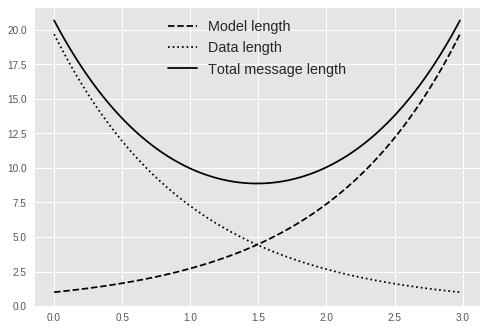

In [0]:
# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('blue')

plt.show()

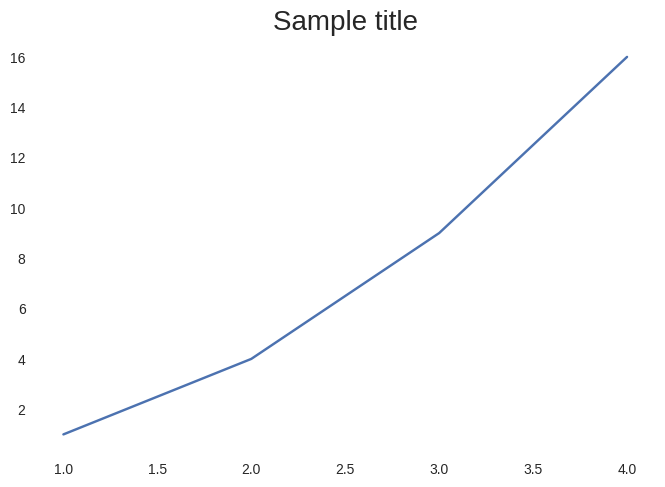

In [0]:
plt.figure(dpi=100, facecolor='white') # this increases the resolution and sets the background color; the default dpi is 70
plt.plot([1, 2, 3, 4], [1, 4, 9, 16]) # With this syntax, you can provide a list of x data and a list of y data
# plt.rc('axes', titlesize=20) # increase
plt.rc('font', size=12) # I want to change the axes tick font, but for some reason this doesn't work in Google Colab
plt.title('Sample title', fontsize=20) # increase the title size
plt.grid(b=False) # remove the grid from the background
plt.gca().set_facecolor('white') # gca stands for "get current axis" (a panel of the figure), and will allow you to manipulate it
plt.savefig('samplegraph.png', dpi=1000) # save it so we can download it and put into presentations; must save before plt.show()
# the dpi parameter increases the resolution from what you see here
plt.show()

In [0]:
# After saving the image in Google Colab, you download it
from google.colab import files
files.download('samplegraph.png') # png does not lose pixels

## Useful Functions

### Text

plt.text() allows you to place text at any x, y position on the graph.

### Annotate

plt.annotate() will add a label and an arrow to the place it's annotating. Use Tab to see what parameters it requires

# Add Plotly and Seaborn

## BRAINSTORMING SECTION

### Misc different types of graphs



In [0]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

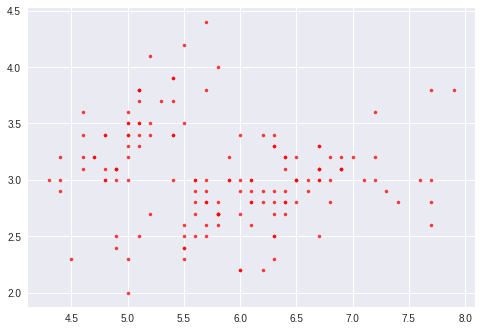

In [0]:
scatterplot(iris['sepal_length'], iris['sepal_width'])

In [0]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

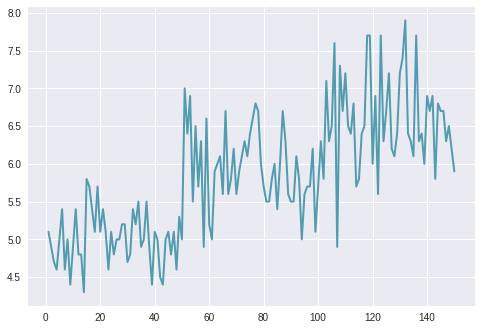

In [0]:
lineplot(range(1, 151), iris['sepal_length'])

In [0]:
def histogram(data, n_bins, cumulative=False, x_label = "", y_label = "", title = ""):
    _, ax = plt.subplots()
    ax.hist(data, n_bins = n_bins, cumulative = cumulative, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
   

In [0]:
histogram(iris['sepal_length'], 5)